# 梯度下降算法

In [65]:
from numpy import * 

def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat


def sigmoid(inX):
    return 1.0 / (1+exp(-inX))


def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)
    labelMat = mat(classLabels).transpose()
    m, n = shape(dataMatrix)
    alpha = 0.001
    maxCycle = 500
    weights = ones((n, 1))
    for k in range(maxCycle):
        h = sigmoid(dataMatrix * weights)
        error = (labelMat - h)
        weights = weights + alpha + dataMatrix.transpose() * error
    return weights 


dataArr, labelArr = loadDataSet()
weights = gradAscent(dataArr, labelArr)
weights = weights.flatten().A[0]

C:\Users\Voyager\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


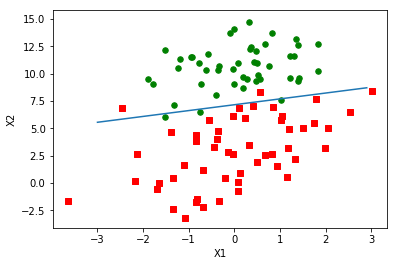

In [66]:
# 画出决策边界
import matplotlib.pyplot as plt

def plotBestFit(weights):
    dataMat, labelMat = loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xcord1, ycord1 = [], []
    xcord2, ycord2 = [], []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1]); ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1]); ycord2.append(dataArr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3, 3, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2')
    plt.show()
    

plotBestFit(weights)

# 随机梯度下降算法

一次仅用一个样本更新回归系数。

是在线学习算法

weights: [ 2.38604812  0.95218922 -0.72978254] (3,)


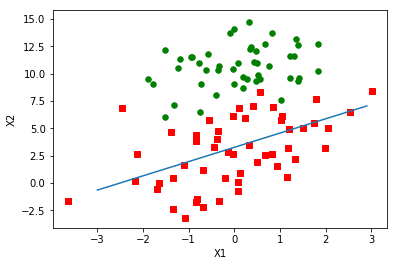

In [67]:
def stocGradAscent0(dataMatrix, classLabels):
    m, n = shape(dataMatrix)
    alpha = 0.1 
    weights = ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i] * weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * array(dataMatrix[i])
    return weights 


weights = stocGradAscent0(dataArr, labelArr)
print('weights:', weights, weights.shape)
plotBestFit(weights)

# 改进的随机梯度下降算法

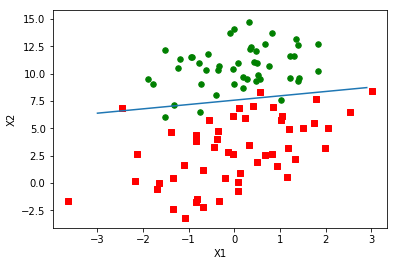

In [75]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m, n = shape(dataMatrix)
    weights = ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4 / (1.0+j+i) + 0.01                           # 每次迭代调正 alpha
            randIndex = int(random.uniform(0, len(dataIndex)))      # 随机选取样本
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * array(dataMatrix[randIndex])
            del (dataIndex[randIndex])
    return weights 


weights = stocGradAscent1(dataArr, labelArr)
plotBestFit(weights)